<a href="https://colab.research.google.com/github/DhrubaAdhikary/Learn_CV_with_Dhruv/blob/master/KMeans_ImageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [10]:
image = mpl.image.imread("dog.jpg")

In [11]:
image

array([[[0.21960784, 0.21960784, 0.21960784, 1.        ],
        [0.21960784, 0.21960784, 0.21960784, 1.        ],
        [0.21960784, 0.21960784, 0.21960784, 1.        ],
        ...,
        [0.21960784, 0.21960784, 0.21960784, 1.        ],
        [0.21960784, 0.21960784, 0.21960784, 1.        ],
        [0.21960784, 0.21960784, 0.21960784, 1.        ]],

       [[0.21960784, 0.21960784, 0.21960784, 1.        ],
        [0.21960784, 0.21960784, 0.21960784, 1.        ],
        [0.21960784, 0.21960784, 0.21960784, 1.        ],
        ...,
        [0.21960784, 0.21960784, 0.21960784, 1.        ],
        [0.21960784, 0.21960784, 0.21960784, 1.        ],
        [0.21960784, 0.21960784, 0.21960784, 1.        ]],

       [[0.21960784, 0.21960784, 0.21960784, 1.        ],
        [0.21960784, 0.21960784, 0.21960784, 1.        ],
        [0.21960784, 0.21960784, 0.21960784, 1.        ],
        ...,
        [0.21960784, 0.21960784, 0.21960784, 1.        ],
        [0.21960784, 0.219607

In [12]:
# Get the original image dimensions
original_shape = image.shape

# Reshape the image to be a 2D array of pixels (n_pixels, n_channels)
# This is the crucial step that was likely done incorrectly before.
pixel_values = image.reshape(-1, 3)

In [13]:
kmeans = KMeans(n_clusters=10, n_init='auto', random_state=42)
kmeans.fit(pixel_values)

KMeans(n_clusters=10, random_state=42)

In [14]:
# --- 3. Reconstruct the Segmented Image ---
# Get the color of the cluster each pixel belongs to.
# kmeans.cluster_centers_ holds the representative colors (the centroids).
# kmeans.labels_ is an array that gives the cluster index for each pixel.
segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]

In [15]:
# Reshape the 2D pixel array back to the original 3D image shape.
# Ensure the data type is correct for image display (e.g., uint8).
segmented_image = segmented_pixels.reshape(original_shape).astype(np.uint8)


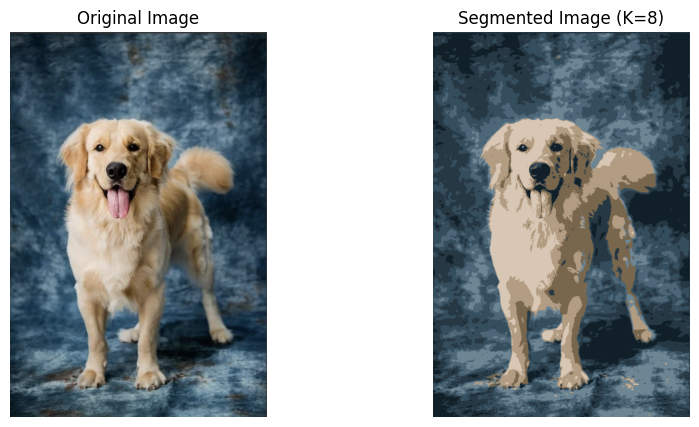

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load the Image ---
# Make sure to replace 'your_image.jpg' with the path to your image.
image = cv2.imread('dog.jpg')
# Convert the image from BGR (OpenCV's default) to RGB for correct color display with Matplotlib.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# --- 2. Pre-process the Image ---
# Reshape the image to be a list of pixels (a 2D array).
# Each row is a pixel and each column is a color channel (R, G, B).
pixel_values = image.reshape((-1, 3))
# Convert to float32, which is required by the k-means function.
pixel_values = np.float32(pixel_values)

# --- 3. Apply K-Means Clustering ---
# Define the number of clusters (K). This will be the number of dominant colors.
K = 8

# Define the stopping criteria for the algorithm.
# It stops when either the specified accuracy is reached or the max number of iterations is met.
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Perform K-means clustering.
# compactness: The sum of squared distance from each point to its corresponding center.
# labels: An array where each element is the cluster index (0 to K-1) for the corresponding pixel.
# centers: An array of cluster centers (the K dominant colors).
compactness, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# --- 4. Reconstruct the Segmented Image ---
# Convert the cluster centers (which are floats) back to 8-bit unsigned integers.
centers = np.uint8(centers)

# Map each pixel's label to its corresponding center color.
segmented_data = centers[labels.flatten()]

# Reshape the segmented data back to the original image dimensions.
segmented_image = segmented_data.reshape((image.shape))

# --- 5. Display the Results ---
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Segmented Image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f'Segmented Image (K={K})')
plt.axis('off')

plt.show()

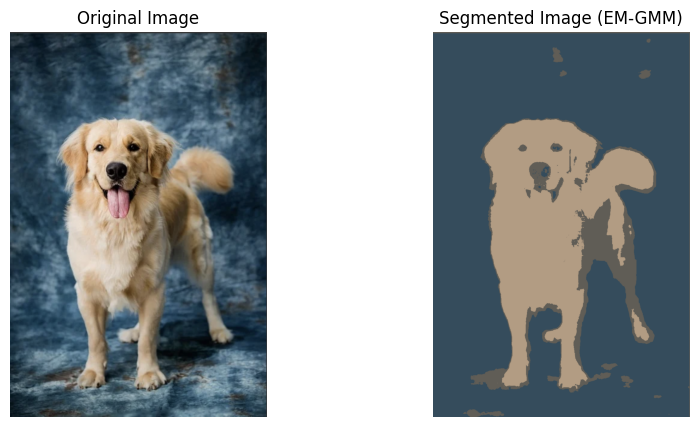

In [18]:
import numpy as np
import cv2
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load image
image = cv2.imread("dog.jpg") # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert BGR to RGB

# Reshape image into a feature vector
pixels = image.reshape(-1, 3) # Convert to (num_pixels, 3) for RGB

# Apply Gaussian Mixture Model (GMM) for clustering
num_clusters = 3 # Number of segments
gmm = GaussianMixture(n_components=num_clusters, covariance_type='tied', random_state=42)
gmm.fit(pixels)

# Predict pixel clusters
labels = gmm.predict(pixels)

# Assign each pixel to the cluster mean
segmented_pixels = gmm.means_[labels].astype(np.uint8)

# Reshape back to original image shape
segmented_image = segmented_pixels.reshape(image.shape)

# Display original and segmented images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(segmented_image)
ax[1].set_title("Segmented Image (EM-GMM)")
ax[1].axis("off")

plt.show()